In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")


In [21]:
trader_df = pd.read_csv("historical_data.csv")                       
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [22]:
trader_df.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [23]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [24]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date

In [25]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [26]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

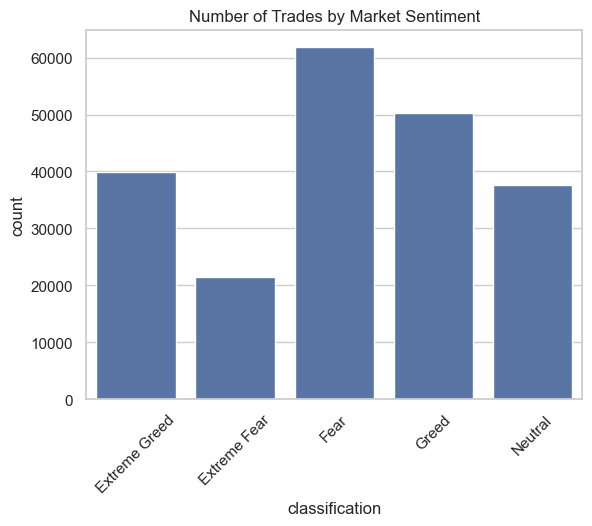

In [27]:
sns.countplot(data=merged_df, x='classification')
plt.title("Number of Trades by Market Sentiment")
plt.xticks(rotation=45)
plt.show()

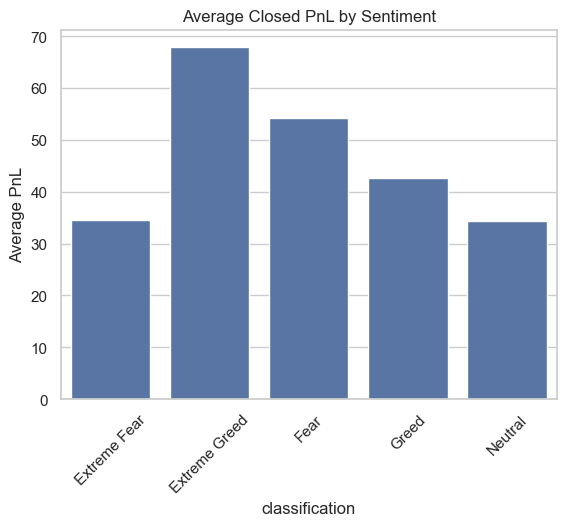

In [28]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

sns.barplot(data=avg_pnl, x='classification', y='Closed PnL')
plt.title("Average Closed PnL by Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.show()

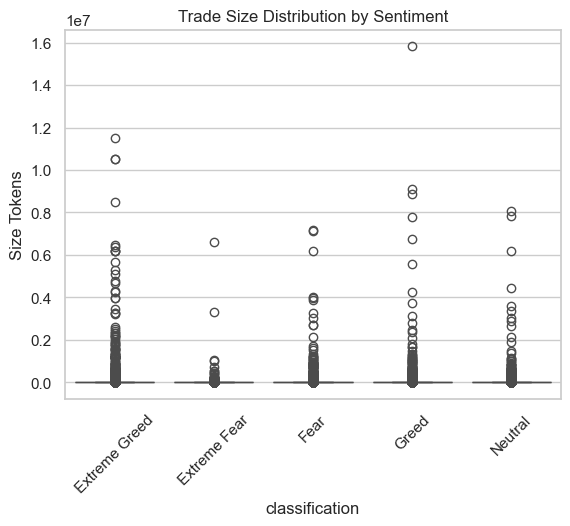

In [29]:
merged_df['Size Tokens'] = pd.to_numeric(merged_df['Size Tokens'], errors='coerce')

sns.boxplot(data=merged_df, x='classification', y='Size Tokens')
plt.title("Trade Size Distribution by Sentiment")
plt.xticks(rotation=45)
plt.show()

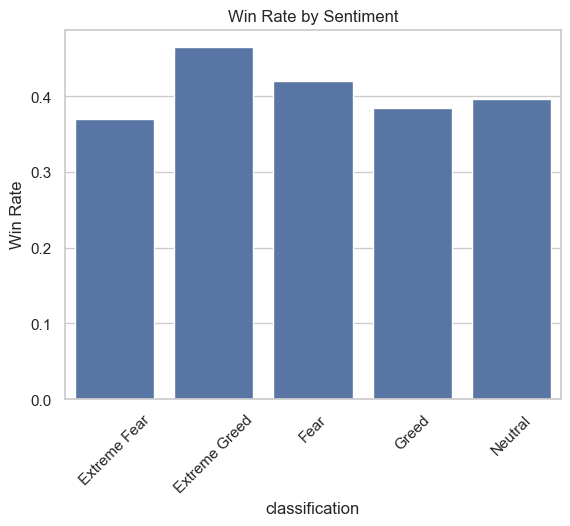

In [30]:
merged_df['win'] = merged_df['Closed PnL'] > 0

win_rate = merged_df.groupby('classification')['win'].mean().reset_index()

sns.barplot(data=win_rate, x='classification', y='win')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.show()

In [31]:
merged_df.to_csv("final_trader_sentiment_merged.csv", index=False)

In [32]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST']).dt.date

merged_df = pd.merge(trader_df, sentiment_df[['date', 'value', 'classification']], on='date', how='left')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed


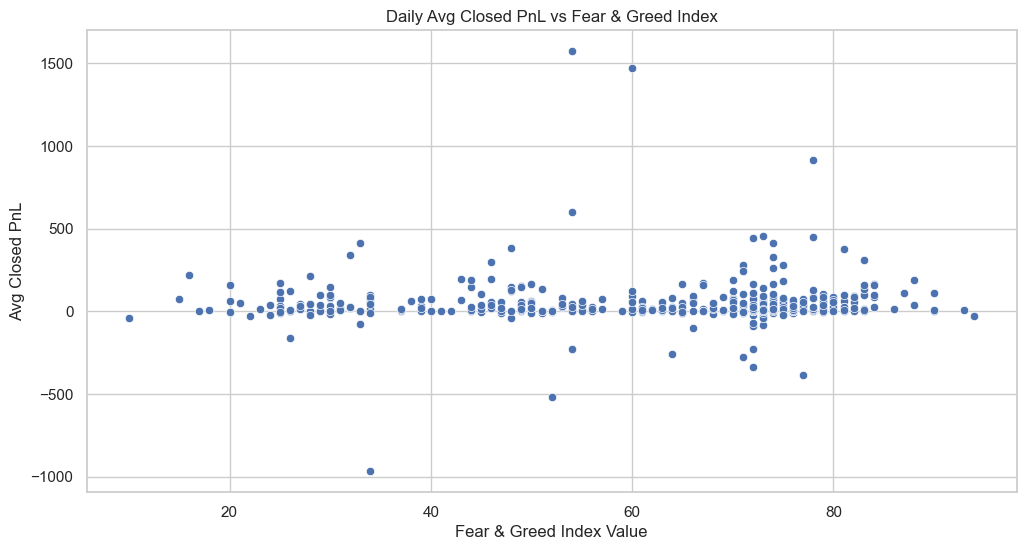

In [33]:
daily_pnl_sentiment = merged_df.groupby('date').agg({
    'Closed PnL': 'mean',
    'value': 'first'
}).dropna()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=daily_pnl_sentiment, x='value', y='Closed PnL')
plt.title('Daily Avg Closed PnL vs Fear & Greed Index')
plt.xlabel('Fear & Greed Index Value')
plt.ylabel('Avg Closed PnL')
plt.grid(True)
plt.show()


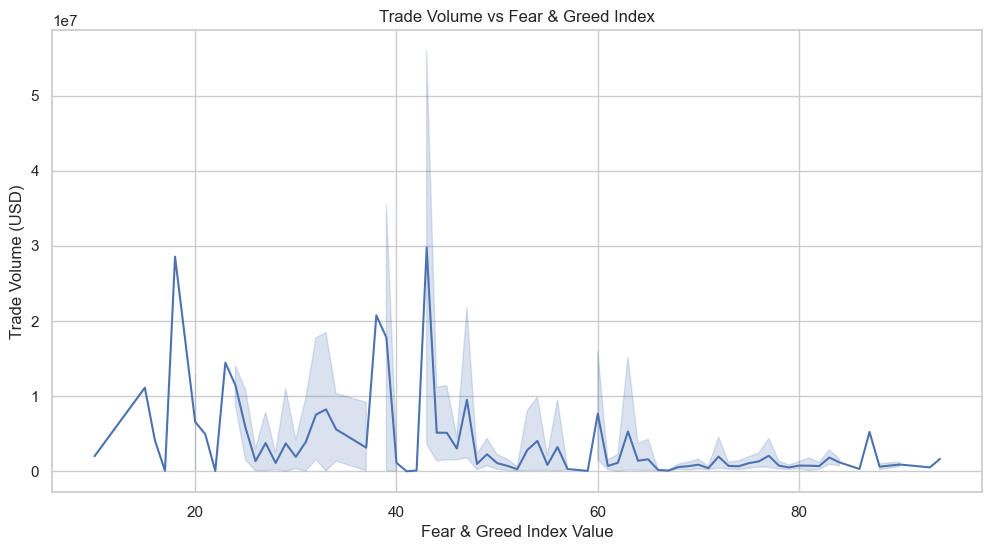

In [34]:
daily_volume_sentiment = merged_df.groupby('date').agg({
    'Size USD': 'sum',
    'value': 'first'
}).dropna()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_volume_sentiment, x='value', y='Size USD')
plt.title('Trade Volume vs Fear & Greed Index')
plt.xlabel('Fear & Greed Index Value')
plt.ylabel('Trade Volume (USD)')
plt.grid(True)
plt.show()


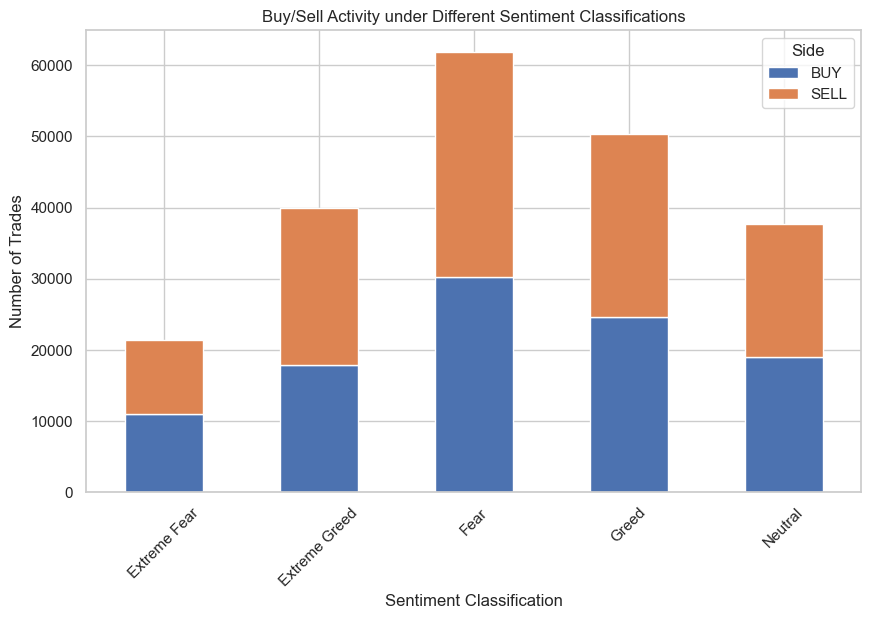

In [35]:
sentiment_direction = merged_df.groupby(['classification', 'Side']).size().unstack().fillna(0)

sentiment_direction.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Buy/Sell Activity under Different Sentiment Classifications')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


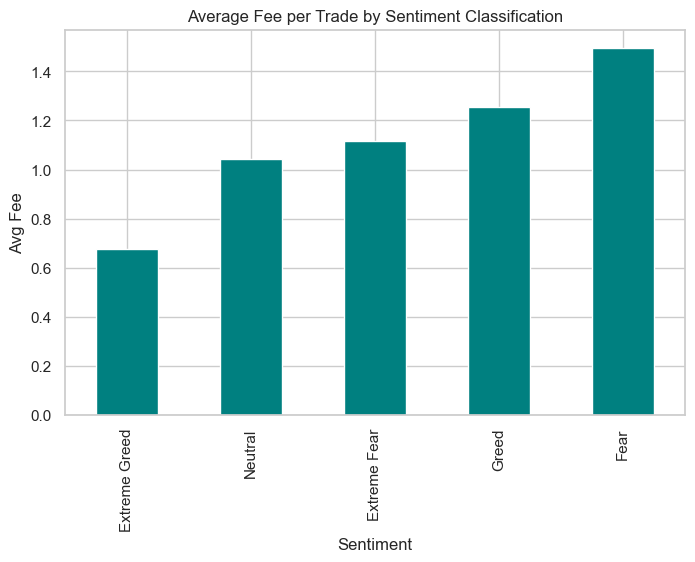

In [36]:
fee_efficiency = merged_df.groupby('classification')['Fee'].mean().sort_values()

fee_efficiency.plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Average Fee per Trade by Sentiment Classification')
plt.ylabel('Avg Fee')
plt.xlabel('Sentiment')
plt.grid(True)
plt.show()
